# Table of Contents:

* [DESCRIPTION](#desc)


* [PART 1](#part1): **Data exploration**
     - [Task 1.1](#task11): Evaluation metric 
     - [Task 1.2](#task12): Validation strategy 
     - [Task 1.3](#task13): Feature exploration 


* [PART 2](#part2): **Data preprocessing**
     - [Task 2.1](#task21): Missing values
     - [Task 2.2](#task22): Feature encoding  
     - [Task 2.3](#task23): Feature selection  
     - [Task 2.4](#task24): Cluster analysis  


* [PART 3](#part3): **Model training**
     - [Task 3.1](#task31): Techniques for imbalanced data
     - [Task 3.2](#task32): Machine learning algorithms
     - [Task 3.3](#task33): Blending/stacking       


* [PART 4](#part4): **Summary**
     - [Task 4.1](#task41): Quality of the models 
     - [Task 4.2](#task42): Models interpretation
     - [Task 4.3](#task43): Conclusions 



---

# Description of the final project <a class="anchor" id="desc"></a>

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than 50k/year) or "50000+" (means more than 50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

## Instructions
### Overview

You have to work independently to complete and submit this assignment. Then the course staff will review and grade your submission and finally you will receive a mark. Please note, that you should provide a solution in the form of the **Jupyter Notebook** with code cells and markdown cells. 

Source Jupyter Notebook with your task and full instructions you can find in section **Lab: Final Project.** Make sure that the instructor can run all the cells to reproduce your results.

#### Steps for a successful submission:
1. Open Lab: Final Project section.
2. Click Launch Jupyter Notebook button.
3. Read all instructions carefully and complete the assignment. 
4. After you get all the results, click **File -> Download As -> Notebook** and save the .ipynb file somewhere on your device.
5. Open this section, attach .ipynb file and submit you solution.


### Review criteria
Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques.

Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero.

---

# PART 1: Data exploration <a class="anchor" id="part1"></a>

In [327]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.inspection import permutation_importance, plot_partial_dependence
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders.target_encoder import TargetEncoder
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from scipy import stats
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations_with_replacement
import shap

In [5]:
sns.__version__

'0.11.2'

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print("Dataset\t|  Observations  | Columns")
print("------------------------------------")
print(f"Train\t|     {train.shape[0]}\t |    {train.shape[1]}")
print(f"Test\t|      {test.shape[0]}\t |    {test.shape[1]}")

Dataset	|  Observations  | Columns
------------------------------------
Train	|     199523	 |    40
Test	|      99762	 |    40


In [8]:
train.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,64,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Cuba,Cuba,Cuba,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,- 50000.
1,16,Not in universe,0,0,9th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,- 50000.
2,45,Private,39,19,10th grade,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,44,- 50000.
3,34,Not in universe,0,0,High school graduate,0,Not in universe,Divorced,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,24,- 50000.
4,50,Local government,43,10,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Never married,Education,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,50000+.


In [9]:
train.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'target'],
      dtype='object')

### Attribute Information:

More information detailing the meaning of the attributes can be found in the Census Bureau's documentation To make use of the data descriptions at this site, the following mappings to the Census Bureau's internal database column names will be needed:

1. **`AAGE`** - age
2. **`ACLSWKR`** - class of worker 
3. **`ADTIND`** - industry code  
4. **`ADTOCC`** - occupation code  
5. **`AHGA`** - education
6. **`AHRSPAY`** - wage per hour
7. **`AHSCOL`** - enrolled in edu inst last wk
8. **`AMARITL`** - marital status
9. **`AMJIND`** - major industry code
10. **`AMJOCC`** - major occupation code
11. **`ARACE`** - mace
12. **`AREORGN`** - hispanic Origin
13. **`ASEX`** - sex
14. **`AUNMEM`** - member of a labor union
15. **`AUNTYPE`** - reason for unemployment
16. **`AWKSTAT`** - full or part time employment stat
17. **`CAPGAIN`** - capital gains
18. **`CAPLOSS`** - capital losses
19. **`DIVVAL`** - divdends from stocks
20. **`FILESTAT`** - tax filer status
21. **`GRINREG`** - region of previous residence
22. **`GRINST`** - state of previous residence
23. **`HHDFMX`** - detailed household and family stat
24. **`HHDREL`** - detailed household summary in household
25. **`MIGMTR1`** - migration code-change in msa
26. **`MIGMTR3`** - migration code-change in reg
27. **`MIGMTR4`** - migration code-move within reg
28. **`MIGSAME`** - live in this house 1 year ago
29. **`MIGSUN`** - migration prev res in sunbelt
30. **`NOEMP`** - num persons worked for employer
31. **`PARENT`** - family members under 18
32. **`PEFNTVTY`** - country of birth father
33. **`PEMNTVTY`** - country of birth mother
34. **`PENATVTY`** - country of birth self
35. **`PRCITSHP`** - citizenship
36. **`SEOTR`** - own business or self employed
37. **`VETQVA`** - fill inc questionnaire for veteran's admin
38. **`VETYN`** - veterans benefits
39. **`WKSWORK`** - weeks worked in year
40. **`target`** - target variable (binary income)

Note that Incomes have been binned at the $50K level to present a binary classification problem, much like the original UCI/ADULT database. The goal field of this data, however, was drawn from the "total person income" field rather than the "adjusted gross income" and may, therefore, behave differently than the orginal ADULT goal field.

Source: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29


## Task 1.1: Evaluation metric <a class="anchor" id="task11"></a>

**1.1.1.** Let's look at the imbalance of the target variable

In [10]:
print("===========================================================")
print("TRAIN sample \t|\tObservations\t|\tRatio")
print("-----------------------------------------------------------")
print(f'Income "< 50k": |\t   {train.target.value_counts()[1]} \t|\t {round(train.target.value_counts()[1]/train.shape[0]*100, 2)}%')
print(f'Income " 50k+": |\t  {train.target.value_counts()[0]} \t|\t{round(train.target.value_counts()[0]/train.shape[0]*100, 2)}%')
print("===========================================================")

print("TEST sample \t|\tObservations\t|\tRatio")
print("-----------------------------------------------------------")
print(f'Income "< 50k": |\t    {test.target.value_counts()[1]} \t|\t {round(test.target.value_counts()[1]/test.shape[0]*100, 2)}%')
print(f'Income " 50k+": |\t   {test.target.value_counts()[0]} \t|\t{round(test.target.value_counts()[0]/test.shape[0]*100, 2)}%')
print("===========================================================")

TRAIN sample 	|	Observations	|	Ratio
-----------------------------------------------------------
Income "< 50k": |	   12382 	|	 6.21%
Income " 50k+": |	  187141 	|	93.79%
TEST sample 	|	Observations	|	Ratio
-----------------------------------------------------------
Income "< 50k": |	    6186 	|	 6.2%
Income " 50k+": |	   93576 	|	93.8%


**1.1.2.** We have imbalanced data: there are 15 times less rich people than poor people.  
For such a task, it is good to use metrics based on `Precision` and `Recall` metrics.  
Therefore, we will take the following metrics:
1. **`Precision`** is a threshold metric that shows what proportion of rich people predicted by the model as rich people are actually rich.
2. **`Recall`** is a threshold metric that shows what proportion of all rich people the model correctly predicted.
3. **`F1 score`** is the harmonic mean of the `Precision` and `Recall`.
4. **`AUC PR`** (aka `Average Precision`) - an integral metric that estimates the area under the PR curve.


**Note.** For the threshold metric (`Precision`, `Recall`, and `F1 score`), the threshold is equal 0.5 by default, which may not be the optimal value. Therefore, we separately calculate the integral metric `AUC PR`, which does not depend on the threshold.

**1.1.3.** We will use **`AUС PR`** as the main metric for evaluating models

**1.1.4.** Other popular metrics for classification, such as `Accuracy` and `AUC ROC`, may show overestimated values on imbalanced data (so they are not suitable for our task). This has been experimentally shown in the paper:  
*Takaya Saito and Marc Rehmsmeier. 2015. The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. PLoS ONE 10(3) (2015). https://doi.org/10.1371/journal.pone.0118432*

## Task 1.2: Validation strategy <a class="anchor" id="task12"></a>

In [11]:
print("===========================================================")
print("TRAIN sample \t|\tObservations\t|\tRatio")
print("-----------------------------------------------------------")
print(f'Income "< 50k": |\t   {train.target.value_counts()[1]} \t|\t {round(train.target.value_counts()[1]/train.shape[0]*100, 2)}%')
print(f'Income " 50k+": |\t  {train.target.value_counts()[0]} \t|\t{round(train.target.value_counts()[0]/train.shape[0]*100, 2)}%')
print("===========================================================")

print("TEST sample \t|\tObservations\t|\tRatio")
print("-----------------------------------------------------------")
print(f'Income "< 50k": |\t    {test.target.value_counts()[1]} \t|\t {round(test.target.value_counts()[1]/test.shape[0]*100, 2)}%')
print(f'Income " 50k+": |\t   {test.target.value_counts()[0]} \t|\t{round(test.target.value_counts()[0]/test.shape[0]*100, 2)}%')
print("===========================================================")

TRAIN sample 	|	Observations	|	Ratio
-----------------------------------------------------------
Income "< 50k": |	   12382 	|	 6.21%
Income " 50k+": |	  187141 	|	93.79%
TEST sample 	|	Observations	|	Ratio
-----------------------------------------------------------
Income "< 50k": |	    6186 	|	 6.2%
Income " 50k+": |	   93576 	|	93.8%


**1.2.1.** We have highly imbalanced data, so we'll use **`StratifiedKFold`** with 5-fold cross-validation scheme to train basic models. For tuning the hyperparameters we will use AUC PR.

**1.2.2.** To train an ensemble of models (meta-algorithm), let's use **`blending`** as a simpler ensemble scheme. To do this, we will select half of the test sample as a validation sample (3093 observations), for training the meta-algorithm.  
We will have enough observations of the minority class in the validation sample for training the meta-algorithm (`Frank Harrell's rule`: we need to have 30-50 observations of the minority class per one independent variable (independent variable is basic model predictions)).  
The remaining new test sample will also contain enough number of minority class observations (3093).

## Task 1.3: Feature exploration <a class="anchor" id="task13"></a>

**1.3.1.** Let's select **`categorical features`** by data type (for object data) and by description (for numeric data).

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

**1.3.2.** Based on the data type, the following features can be classified as **`categorical`**:

In [13]:
data = train.dtypes
cat_features = []
for name in data.keys():
    if str(data.loc[name]).find('object') != -1 and name != 'target':
        cat_features.append(name)

print("  Name of object features  |  Unique values ")
print("---------------------------------------------")
for name in cat_features:
    print(f"\t  {name}   \t   |   \t   {len(np.unique(train[name]))}")


  Name of object features  |  Unique values 
---------------------------------------------
	  ACLSWKR   	   |   	   9
	  AHGA   	   |   	   17
	  AHSCOL   	   |   	   3
	  AMARITL   	   |   	   7
	  AMJIND   	   |   	   24
	  AMJOCC   	   |   	   15
	  ARACE   	   |   	   5
	  AREORGN   	   |   	   10
	  ASEX   	   |   	   2
	  AUNMEM   	   |   	   3
	  AUNTYPE   	   |   	   6
	  AWKSTAT   	   |   	   8
	  FILESTAT   	   |   	   6
	  GRINREG   	   |   	   6
	  GRINST   	   |   	   51
	  HHDFMX   	   |   	   38
	  HHDREL   	   |   	   8
	  MIGMTR1   	   |   	   10
	  MIGMTR3   	   |   	   9
	  MIGMTR4   	   |   	   10
	  MIGSAME   	   |   	   3
	  MIGSUN   	   |   	   4
	  PARENT   	   |   	   5
	  PEFNTVTY   	   |   	   43
	  PEMNTVTY   	   |   	   43
	  PENATVTY   	   |   	   43
	  PRCITSHP   	   |   	   5
	  VETQVA   	   |   	   3


In [14]:
num_features = []
for i in data.keys():
    if str(data.loc[i]).find('int64') != -1 :
        num_features.append(i)

print("  Name of int64 features   |  Unique values ")
print("---------------------------------------------")
for name in num_features:
    print(f"\t  {name}   \t   |   \t   {len(np.unique(train[name]))}")

  Name of int64 features   |  Unique values 
---------------------------------------------
	  AAGE   	   |   	   91
	  ADTIND   	   |   	   52
	  ADTOCC   	   |   	   47
	  AHRSPAY   	   |   	   1240
	  CAPGAIN   	   |   	   132
	  CAPLOSS   	   |   	   113
	  DIVVAL   	   |   	   1478
	  NOEMP   	   |   	   7
	  SEOTR   	   |   	   3
	  VETYN   	   |   	   3
	  WKSWORK   	   |   	   53


**1.3.3.** Based on the description, the following features with numerical data can be classified as **`categorical`**:
* **`ADTIND`** - industry code   
* **`ADTOCC`** - occupation code   
* **`SEOTR`** - own business or self employed  
* **`VETYN`** - veterans benefits  

**1.3.4.** Based on the description, the following features with numerical data can be classified as **`numerical`**:
* **`AAGE`** - age  
* **`AHRSPAY`** - wage per hour  
* **`CAPGAIN`** - capital gains  
* **`CAPLOSS`** - capital losses  
* **`DIVVAL`** - divdends from stocks  
* **`NOEMP`** - num persons worked for employer  
* **`WKSWORK`** - weeks worked in year  



**1.3.5.** Let's create final lists with categorical and numeric features

In [15]:
for name in ['ADTIND', 'ADTOCC', 'SEOTR', 'VETYN']:
    num_features.remove(name)
    cat_features.append(name)

In [16]:
num_features

['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'NOEMP', 'WKSWORK']

In [17]:
cat_features

['ACLSWKR',
 'AHGA',
 'AHSCOL',
 'AMARITL',
 'AMJIND',
 'AMJOCC',
 'ARACE',
 'AREORGN',
 'ASEX',
 'AUNMEM',
 'AUNTYPE',
 'AWKSTAT',
 'FILESTAT',
 'GRINREG',
 'GRINST',
 'HHDFMX',
 'HHDREL',
 'MIGMTR1',
 'MIGMTR3',
 'MIGMTR4',
 'MIGSAME',
 'MIGSUN',
 'PARENT',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'VETQVA',
 'ADTIND',
 'ADTOCC',
 'SEOTR',
 'VETYN']

**1.3.6.** Let's see at the distribution of the ratio of rich people by category for all categorical features:

In [18]:
y_train = train.target
X_train = train.drop(['target'], axis=1)

y_test = test.target
X_test = test.drop(['target'], axis=1)

In [19]:
# encode the target variable in 0 (poor) and 1 (rich)
map_target = {' - 50000.': 0, ' 50000+.' : 1}
y_train = y_train.map(map_target)
y_test = y_test.map(map_target)
train.target = train.target.map(map_target)
test.target = test.target.map(map_target)

# control
print("Train sample, target rich-rate:", y_train.mean())
print("Test sample, target rich-rate:", y_test.mean())
print("Train sample, target rich-rate:", train.target.mean())
print("Test sample, target rich-rate:", test.target.mean())

Train sample, target rich-rate: 0.06205800834991455
Test sample, target rich-rate: 0.06200757803572503
Train sample, target rich-rate: 0.06205800834991455
Test sample, target rich-rate: 0.06200757803572503


In [20]:
X_train.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK'],
      dtype='object')

In [21]:
X_test.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK'],
      dtype='object')

<ipython-input-22-4f3ab5aa50c1>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))


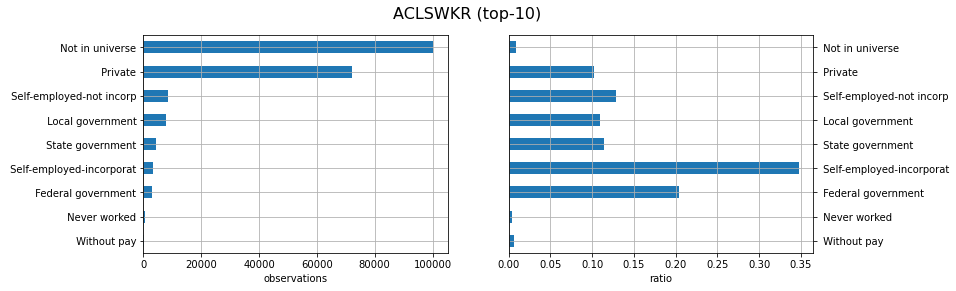

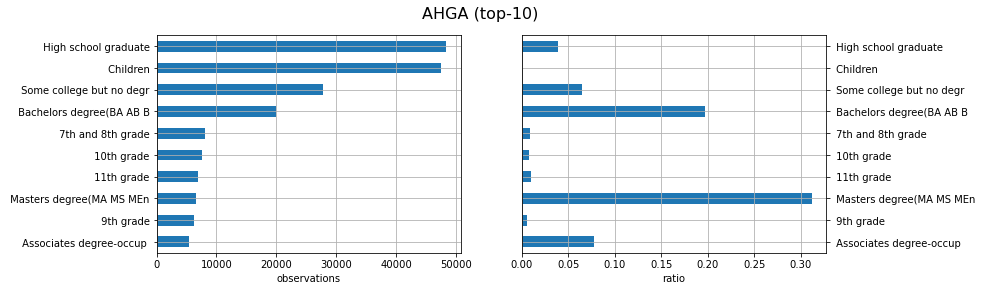

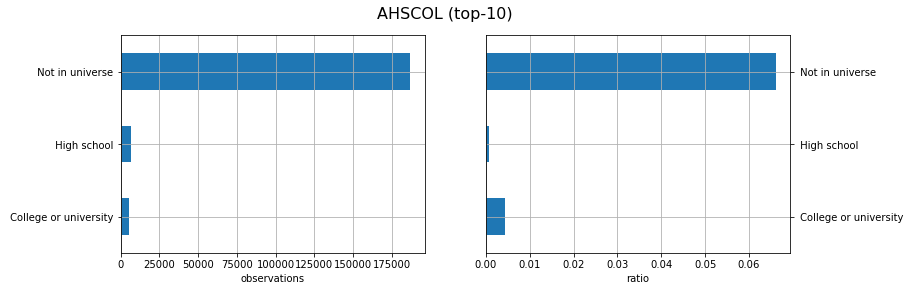

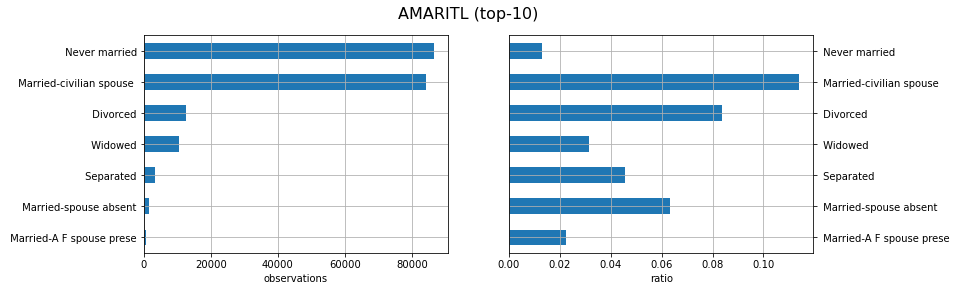

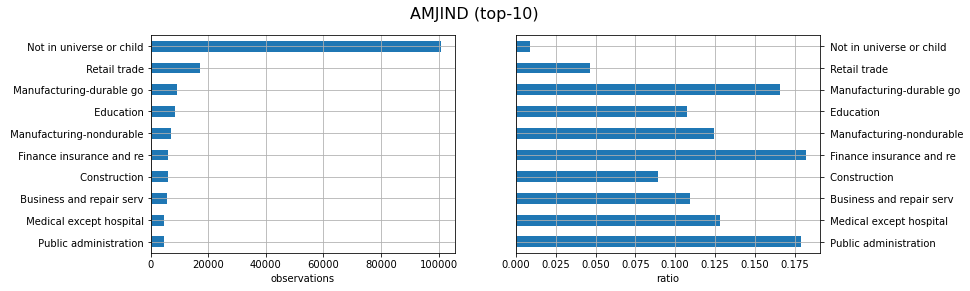

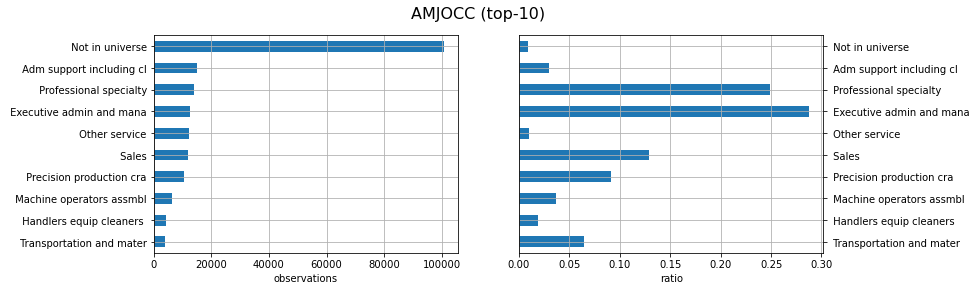

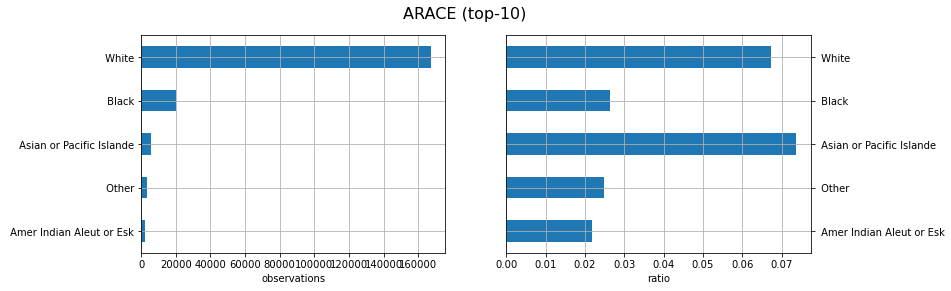

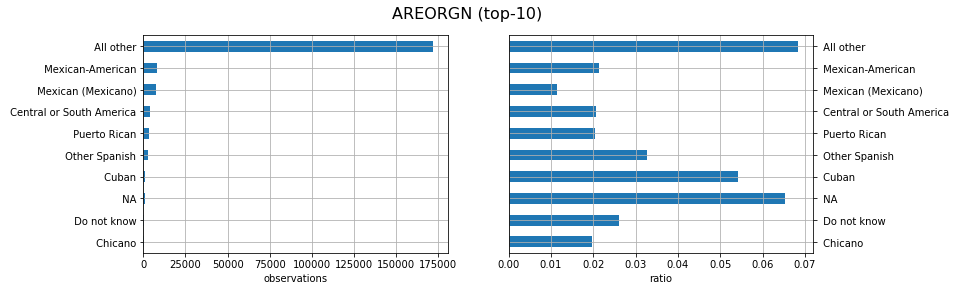

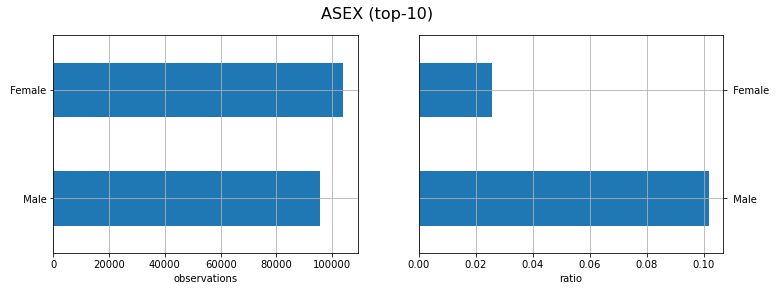

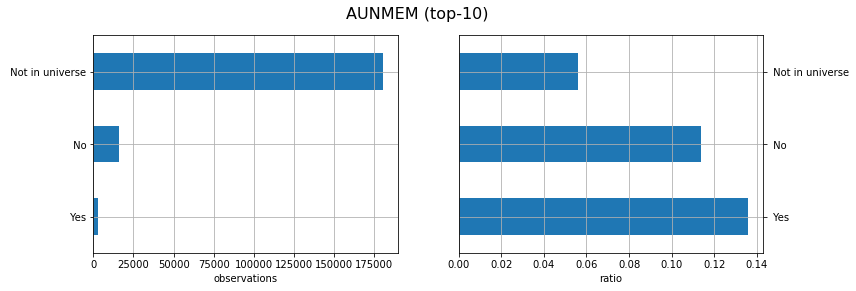

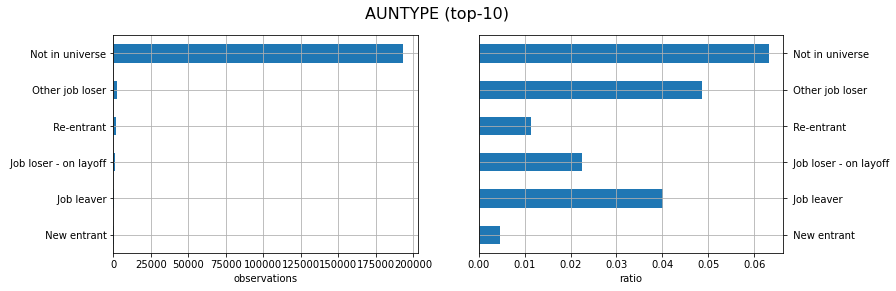

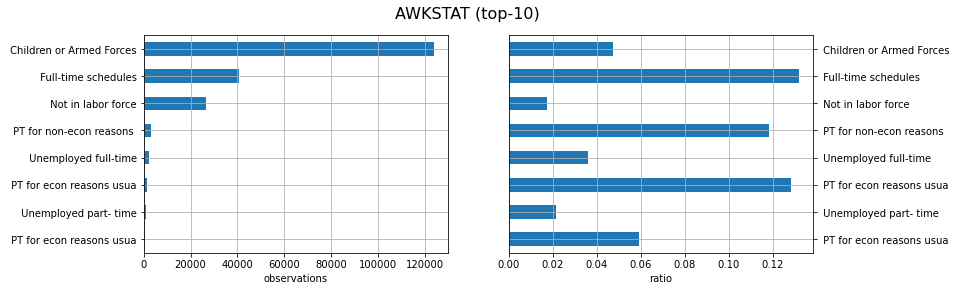

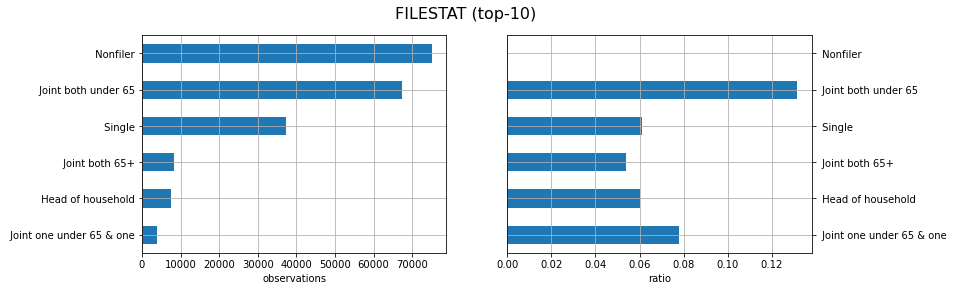

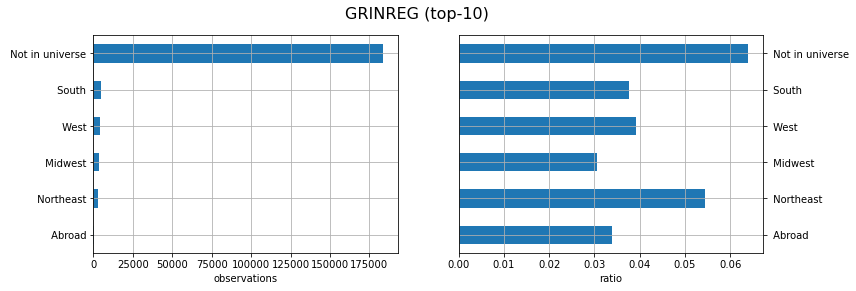

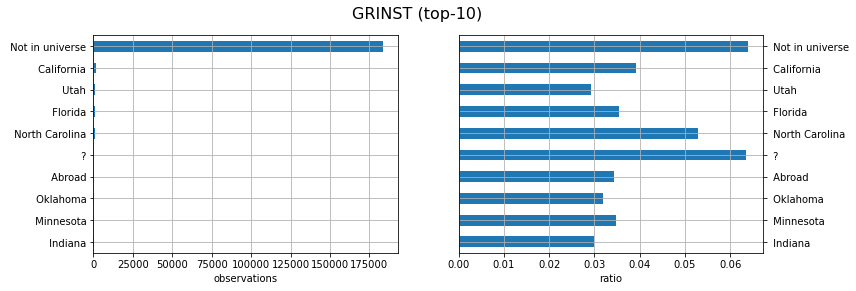

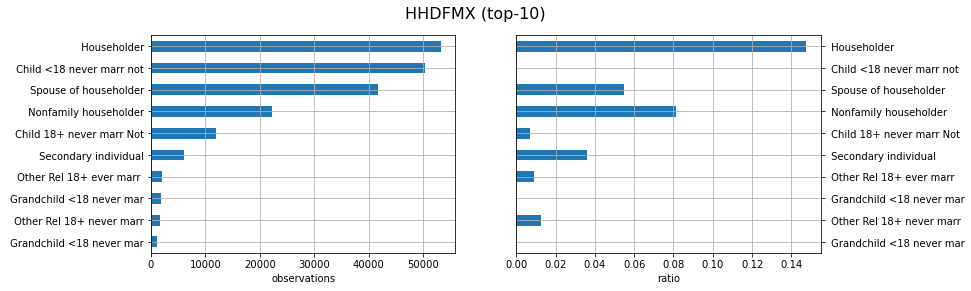

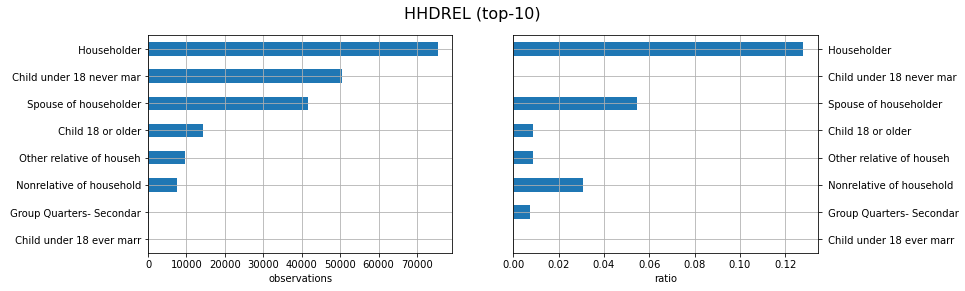

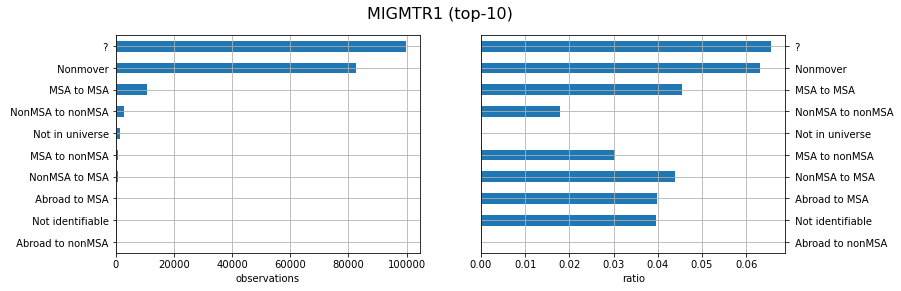

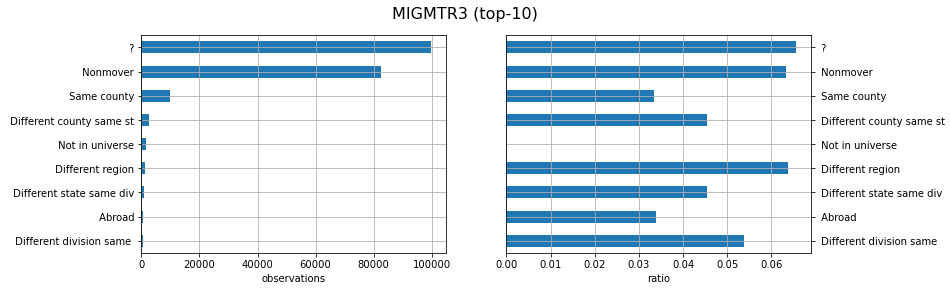

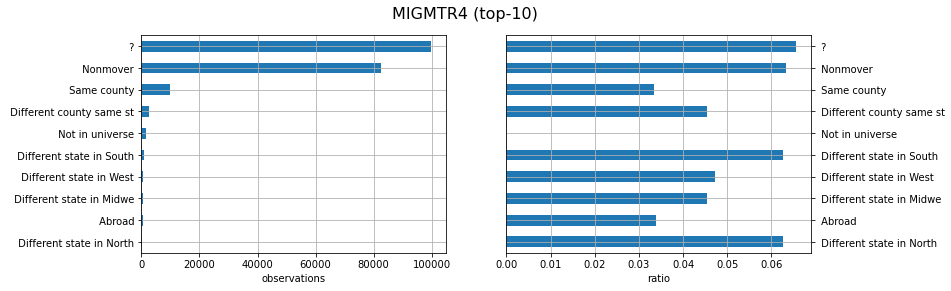

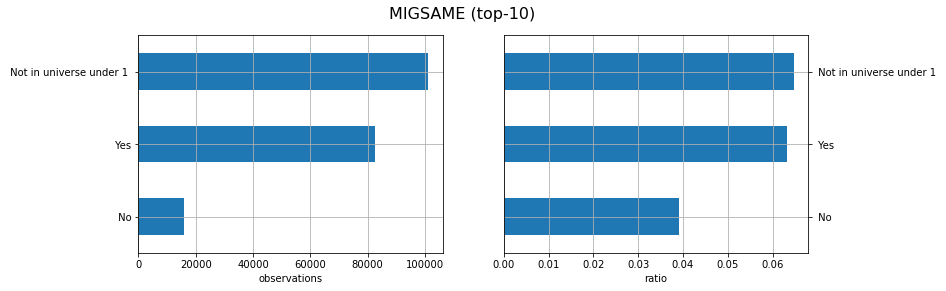

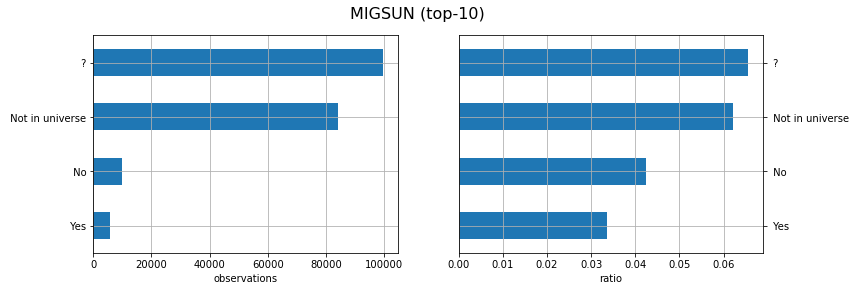

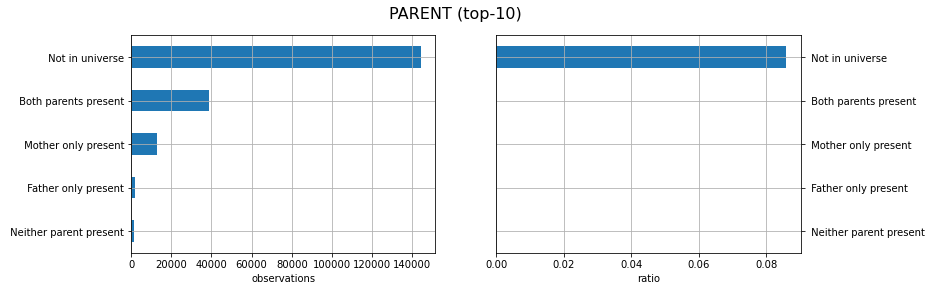

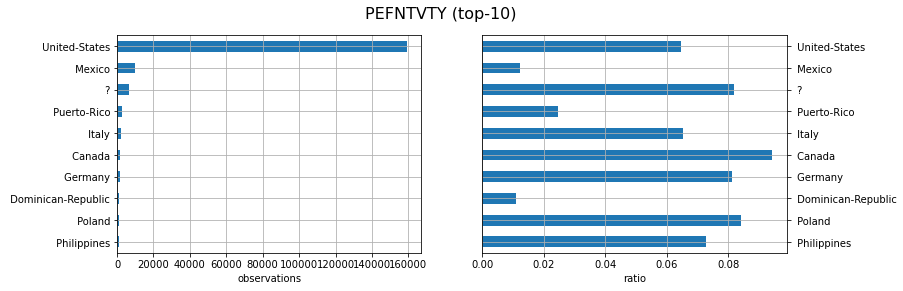

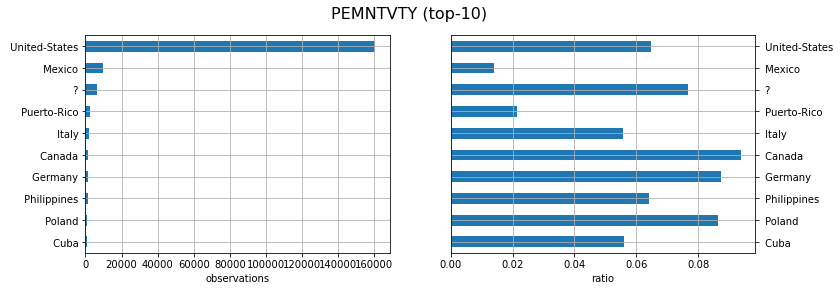

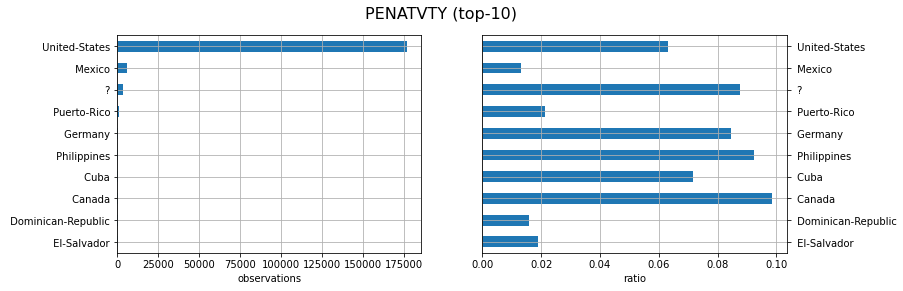

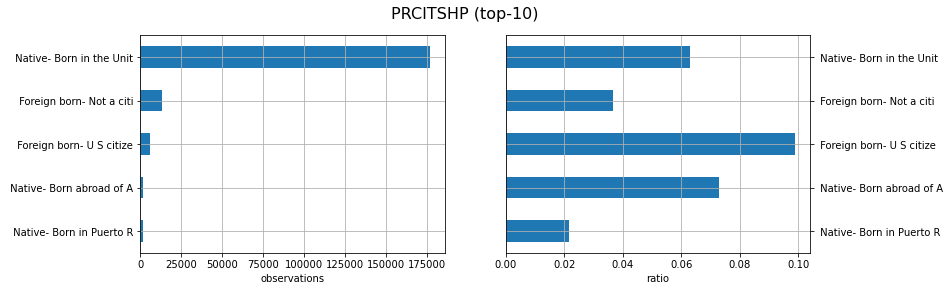

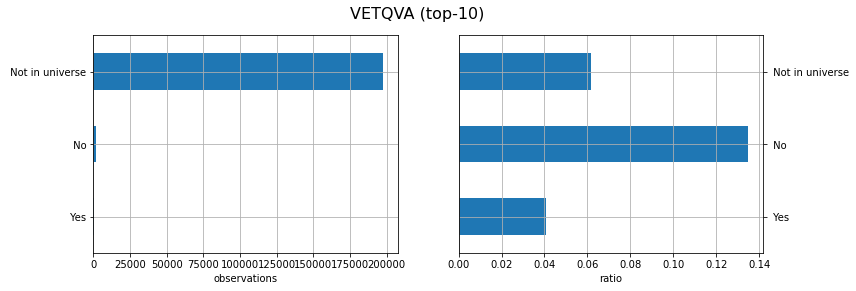

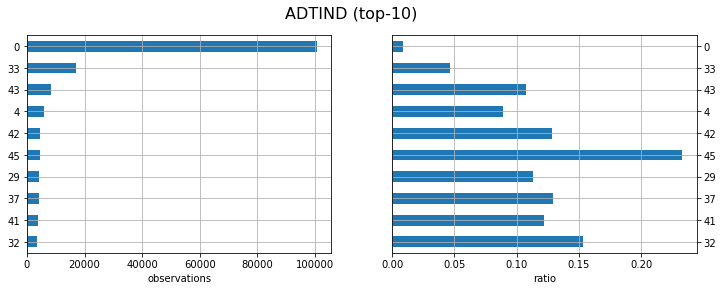

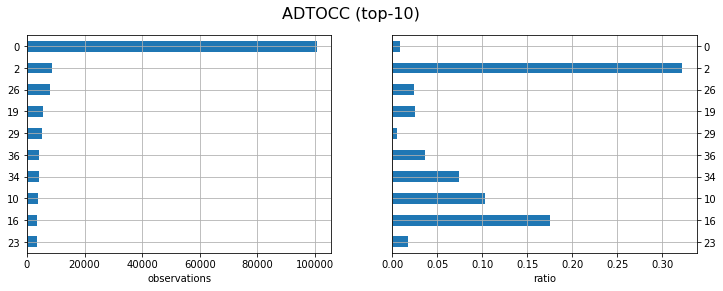

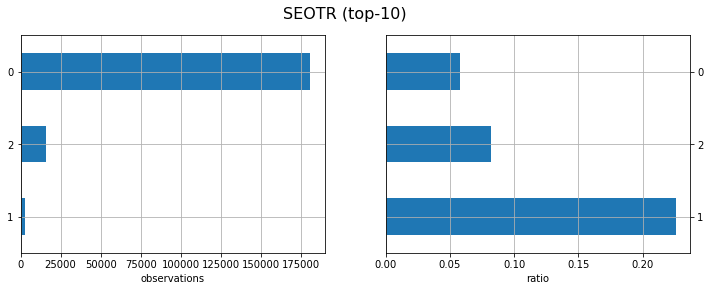

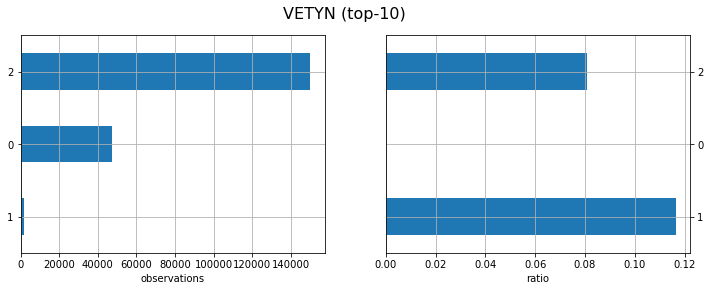

In [22]:
max_len = 25
top = 10

for c in cat_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{c} (top-{top})', fontsize=16)
    pivot = X_train.assign(cnt=1, target=y_train).pivot_table(index=c, columns='target', values='cnt',
                                                              aggfunc='count', fill_value=0)
    pivot['num_obs'] = pivot.sum(axis=1)
    pivot['ratio_target'] = pivot[1] / pivot.num_obs
    pivot.sort_values('num_obs', inplace=True)
    pivot = pivot.tail(top)
    pivot.num_obs.plot.barh(ax=ax[0])
    
    labels = []
    for label in ax[0].get_yticklabels():
        text = label.get_text()
        if len(text) > max_len:
            label.set_text(text[:max_len])
        labels.append(label)
    
    ax[0].set_yticklabels(labels)
    ax[0].set_ylabel('')
    ax[0].set_xlabel('observations')
    ax[0].grid()
    
    pivot.ratio_target.plot.barh(ax=ax[1])
    
    labels = []
    for label in ax[1].get_yticklabels():
        text = label.get_text()
        if len(text) > max_len:
            label.set_text(text[:max_len])
        labels.append(label)
    
    ax[1].set_yticklabels(labels)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('ratio')
    ax[1].yaxis.tick_right()
    ax[1].grid()

X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1)

**1.3.7.** We see that all categorical features have non uniform distributions of the rich people ratio by category, so all categorical features can be used for further processing.

**1.3.8.** Let's see at the distribution of the ratio of rich people by bins for all numerical features:

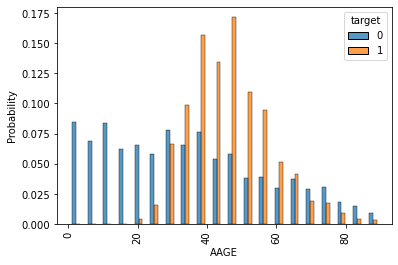

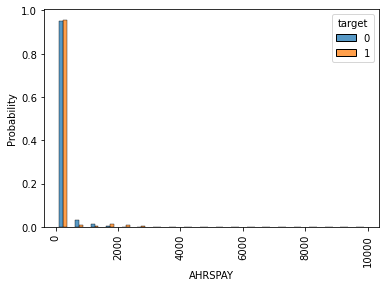

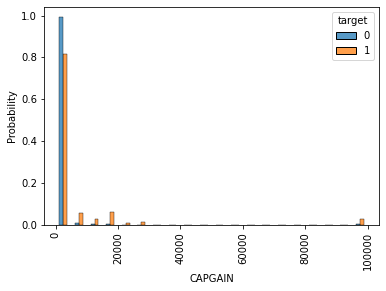

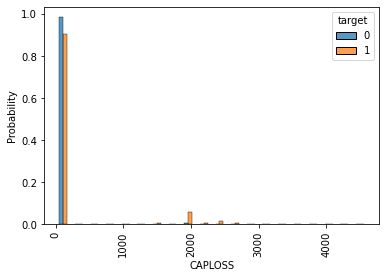

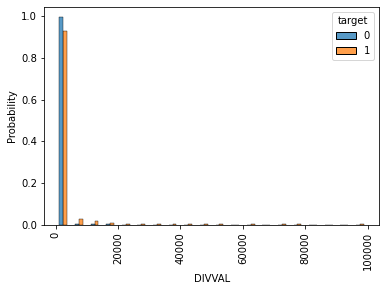

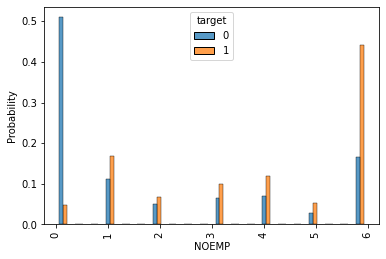

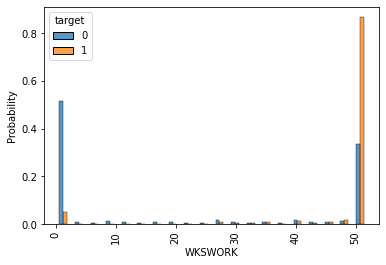

In [23]:
for n in num_features:
    sns.histplot(data=train, x=n, stat='probability', common_norm=False , hue="target", multiple="dodge", shrink=0.5, bins = 20)
    plt.xticks(rotation=90)
    plt.show();

**1.3.9.** We see that the **`AHRSPAY`** numerical feature has the same distributions the `rich` and `poor` people, so this feature can be dropped, since it has little effect on the target variable.

**1.3.10.** We also see that other numerical features have different forms of distributions for rich and poor people, so all numerical features can be used for further processing.

**1.3.11.** We will select variables after encoding categorical variables, since many selection methods work on transformed data (correlation matrix, PСA, etc.).

In [24]:
X_train.drop(['AHRSPAY'], axis=1, inplace=True)
X_test.drop(['AHRSPAY'], axis=1, inplace=True)
num_features.remove('AHRSPAY')

In [25]:
num_features

['AAGE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'NOEMP', 'WKSWORK']

In [26]:
X_train.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4',
       'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY',
       'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK'],
      dtype='object')

In [27]:
X_test.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4',
       'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY',
       'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK'],
      dtype='object')

---

# PART 2: Data preprocessing <a class="anchor" id="part2"></a>

## Task 2.1: Missing values <a class="anchor" id="task21"></a>

In [28]:
describe_info_cat = X_train[cat_features].describe(include='all')
describe_info_cat.loc['num_nulls'] = X_train.shape[0] - describe_info_cat.loc['count']
describe_info_cat.loc['nulls_ratio'] = describe_info_cat.loc['num_nulls'] / X_train.shape[0]
describe_info_cat

,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,VETQVA,ADTIND,ADTOCC,SEOTR,VETYN
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523.000000,199523.000000,199523.000000,199523.000000
unique,9,17,3,7,24,15,5,10,2,3,...,5,43,43,43,5,3,NaN,NaN,NaN,NaN
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,NaN,NaN,NaN,NaN
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,144232,159163,160479,176989,176992,197539,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.352320,11.306556,0.175438,1.514833
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.067129,14.454204,0.553694,0.851473
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,26.000000,0.000000,2.000000


In [29]:
describe_info_num = X_train[num_features].describe()
describe_info_num.loc['num_nulls'] = X_train.shape[0] - describe_info_num.loc['count']
describe_info_num.loc['nulls_ratio'] = describe_info_num.loc['num_nulls'] / X_train.shape[0]
describe_info_num

,AAGE,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,WKSWORK
count,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000
num_nulls,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
nulls_ratio,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


**2.1.1.** Let's check for missing values:

In [30]:
print("Number of missing values")
print(train.isna().sum())

Number of missing values
AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
target      0
dtype: int64


**2.1.2.** The train sample doesn't contain missing values.  
However, different categorical features have categories filled with special meanings such as *'Not in universe'*,  *'Do not know'*, *'?'*, *'NA'*, etc. These values cannot be replaced with zeros or averages, since they can represent specific groups of people (for example, children), so we will use these values for further encoding.

## Task 2.2: Feature encoding <a class="anchor" id="task22"></a>

**2.2.1.** We will encode categorical features using methods:
1. Ordinal features **`AHGA`** and **`AHSCOL`** we will encode into a numeric variable using dictionary;
2. For features that have categories with only one value of the target variable, we will use `Frequency Encoding`;
3. For the rest of the features, we will apply `Mean-Target Encoding`.

**2.2.2.** Let's do **`Mean-Target Encoding`** for those features that meet the conditions above:

In [31]:
mean_target_features = [i for i in cat_features if i not in ['AHGA', 'AHSCOL']]

In [32]:
non_target_enc = []
all_map_dict = dict()

print("\t\t MeanTarget encoding")
print("--------------------------------------------------")
print("  Name   \t   |   min   |   max   | missings")
print("--------------------------------------------------")
for i in mean_target_features:
    map_ = train.groupby(i).target.mean().to_dict()
    if min(map_.values()) == 0:
        print(f"  {i}   \t   | MeanTarget is not defined")
        non_target_enc.append(i)
    else:
        train[i] = train[i].map(lambda x: map_[x])
        all_map_dict[i] = map_
        print(f"  {i}   \t   | {round(train[i].min(), 5)} | {round(train[i].max(), 5)} |    {train[i].isna().sum()}")
print("--------------------------------------------------")

		 MeanTarget encoding
--------------------------------------------------
  Name   	   |   min   |   max   | missings
--------------------------------------------------
  ACLSWKR   	   | 0.00456 | 0.34732 |    0
  AMARITL   	   | 0.01292 | 0.11398 |    0
  AMJIND   	   | 0.00529 | 0.25933 |    0
  AMJOCC   	   | 0.00256 | 0.28756 |    0
  ARACE   	   | 0.02177 | 0.07369 |    0
  AREORGN   	   | 0.01134 | 0.06845 |    0
  ASEX   	   | 0.02561 | 0.10173 |    0
  AUNMEM   	   | 0.05623 | 0.13597 |    0
  AUNTYPE   	   | 0.00456 | 0.06313 |    0
  AWKSTAT   	   | 0.01723 | 0.13173 |    0
  FILESTAT   	   | 0.00047 | 0.13138 |    0
  GRINREG   	   | 0.03049 | 0.06402 |    0
  GRINST   	   | 0.01562 | 0.10256 |    0
  HHDFMX   	   | MeanTarget is not defined
  HHDREL   	   | MeanTarget is not defined
  MIGMTR1   	   | MeanTarget is not defined
  MIGMTR3   	   | MeanTarget is not defined
  MIGMTR4   	   | MeanTarget is not defined
  MIGSAME   	   | 0.03918 | 0.06465 |    0
  MIGSUN   	   | 0.

**2.2.3.** Let's do **`Frequency Encoding`** for those features that meet the conditions above:

In [33]:
print("\t\t\t Frequency Encoding")
print("----------------------------------------------------------------")
print("  Name  \t|\tmin\t|\tmax\t|    missings")
print("----------------------------------------------------------------")
for i in non_target_enc:
    map_ = train[i].value_counts().to_dict()
    train[i] = train[i].map(map_)
    all_map_dict[i] = map_
    print(f"  {i} \t|\t{train[i].min()}\t|\t{train[i].max()}\t|\t{train[i].isna().sum()}")
print("----------------------------------------------------------------")

			 Frequency Encoding
----------------------------------------------------------------
  Name  	|	min	|	max	|    missings
----------------------------------------------------------------
  HHDFMX 	|	1	|	53248	|	0
  HHDREL 	|	47	|	75475	|	0
  MIGMTR1 	|	73	|	99696	|	0
  MIGMTR3 	|	465	|	99696	|	0
  MIGMTR4 	|	431	|	99696	|	0
  PARENT 	|	1653	|	144232	|	0
  PEFNTVTY 	|	25	|	159163	|	0
  PEMNTVTY 	|	32	|	160479	|	0
  PENATVTY 	|	23	|	176989	|	0
  ADTIND 	|	4	|	100684	|	0
  VETYN 	|	1984	|	150130	|	0
----------------------------------------------------------------


**2.2.4.** Let's do encoding for ordinal feature **`AHSCOL`**:

In [36]:
print(train['AHSCOL'].unique())

[' Not in universe' ' High school' ' College or university']


We have values for the dictionary:
* `Not in universe` = 1
* `High School` = 2
* `College or university` = 3

In [37]:
dict_AHSCOL = {' Not in universe': 1, 
               ' High school': 2, 
               ' College or university': 3}

train['AHSCOL'] = train['AHSCOL'].map(dict_AHSCOL)
all_map_dict['AHSCOL'] = dict_AHSCOL

**2.2.5.** Let's do encoding for ordinal feature **`AHGA`**:

In [38]:
train['AHGA'].unique()

array([' 7th and 8th grade', ' 9th grade', ' 10th grade',
       ' High school graduate', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' Associates degree-occup /vocational', ' Children', ' 11th grade',
       ' Bachelors degree(BA AB BS)', ' Some college but no degree',
       ' Associates degree-academic program', ' 5th or 6th grade',
       ' 12th grade no diploma',
       ' Prof school degree (MD DDS DVM LLB JD)',
       ' Doctorate degree(PhD EdD)', ' 1st 2nd 3rd or 4th grade',
       ' Less than 1st grade'], dtype=object)

We have values for the dictionary:
* `Children` = 1
* `Less than 1st grade` = 2
* `1st 2nd 3rd or 4th grade` = 3
* `5th or 6th grade` = 4
* `7th and 8th grade` = 5
* `9th grade` = 6
* `10th grade` = 7
* `11th grade` = 8 
* `12th grade no diploma` = 9
* `High school graduate` = 10
* `Some college but no degree` = 11
* `Associates degree-occup /vocational` = 12
* `Associates degree-academic program` = 13
* `Bachelors degree(BA AB BS)` = 14
* `Masters degree(MA MS MEng MEd MSW MBA)` = 15
* `Doctorate degree(PhD EdD)` -> 16
* `Prof school degree (MD DDS DVM LLB JD)` = 17

In [39]:
dict_AHGA= {' Children': 1, 
            ' Less than 1st grade': 2, 
            ' 1st 2nd 3rd or 4th grade': 3, 
            ' 5th or 6th grade': 4,
            ' 7th and 8th grade': 5, 
            ' 9th grade': 6, 
            ' 10th grade': 7, 
            ' 11th grade': 8 , 
            ' 12th grade no diploma': 9,
            ' High school graduate': 10, 
            ' Some college but no degree': 11, 
            ' Associates degree-occup /vocational': 12,
            ' Associates degree-academic program': 13, 
            ' Bachelors degree(BA AB BS)' : 14,
            ' Masters degree(MA MS MEng MEd MSW MBA)': 15,
            ' Doctorate degree(PhD EdD)': 16,
            ' Prof school degree (MD DDS DVM LLB JD)': 17}

train['AHGA'] = train['AHGA'].map(dict_AHGA)
all_map_dict['AHGA'] = dict_AHGA

In [40]:
all_map_dict.keys()

dict_keys(['ACLSWKR', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'MIGSAME', 'MIGSUN', 'PRCITSHP', 'VETQVA', 'ADTOCC', 'SEOTR', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'ADTIND', 'VETYN', 'AHSCOL', 'AHGA'])

## Task 2.3: Feature selection <a class="anchor" id="task23"></a>

**2.3.1.** Let's remove the highly correlated features. To do this, we will calculate the matrix of pairwise correlations, and from a pair of features with a correlation greater than **0.8** we will remove the one that has a lower correlation with the target variable.

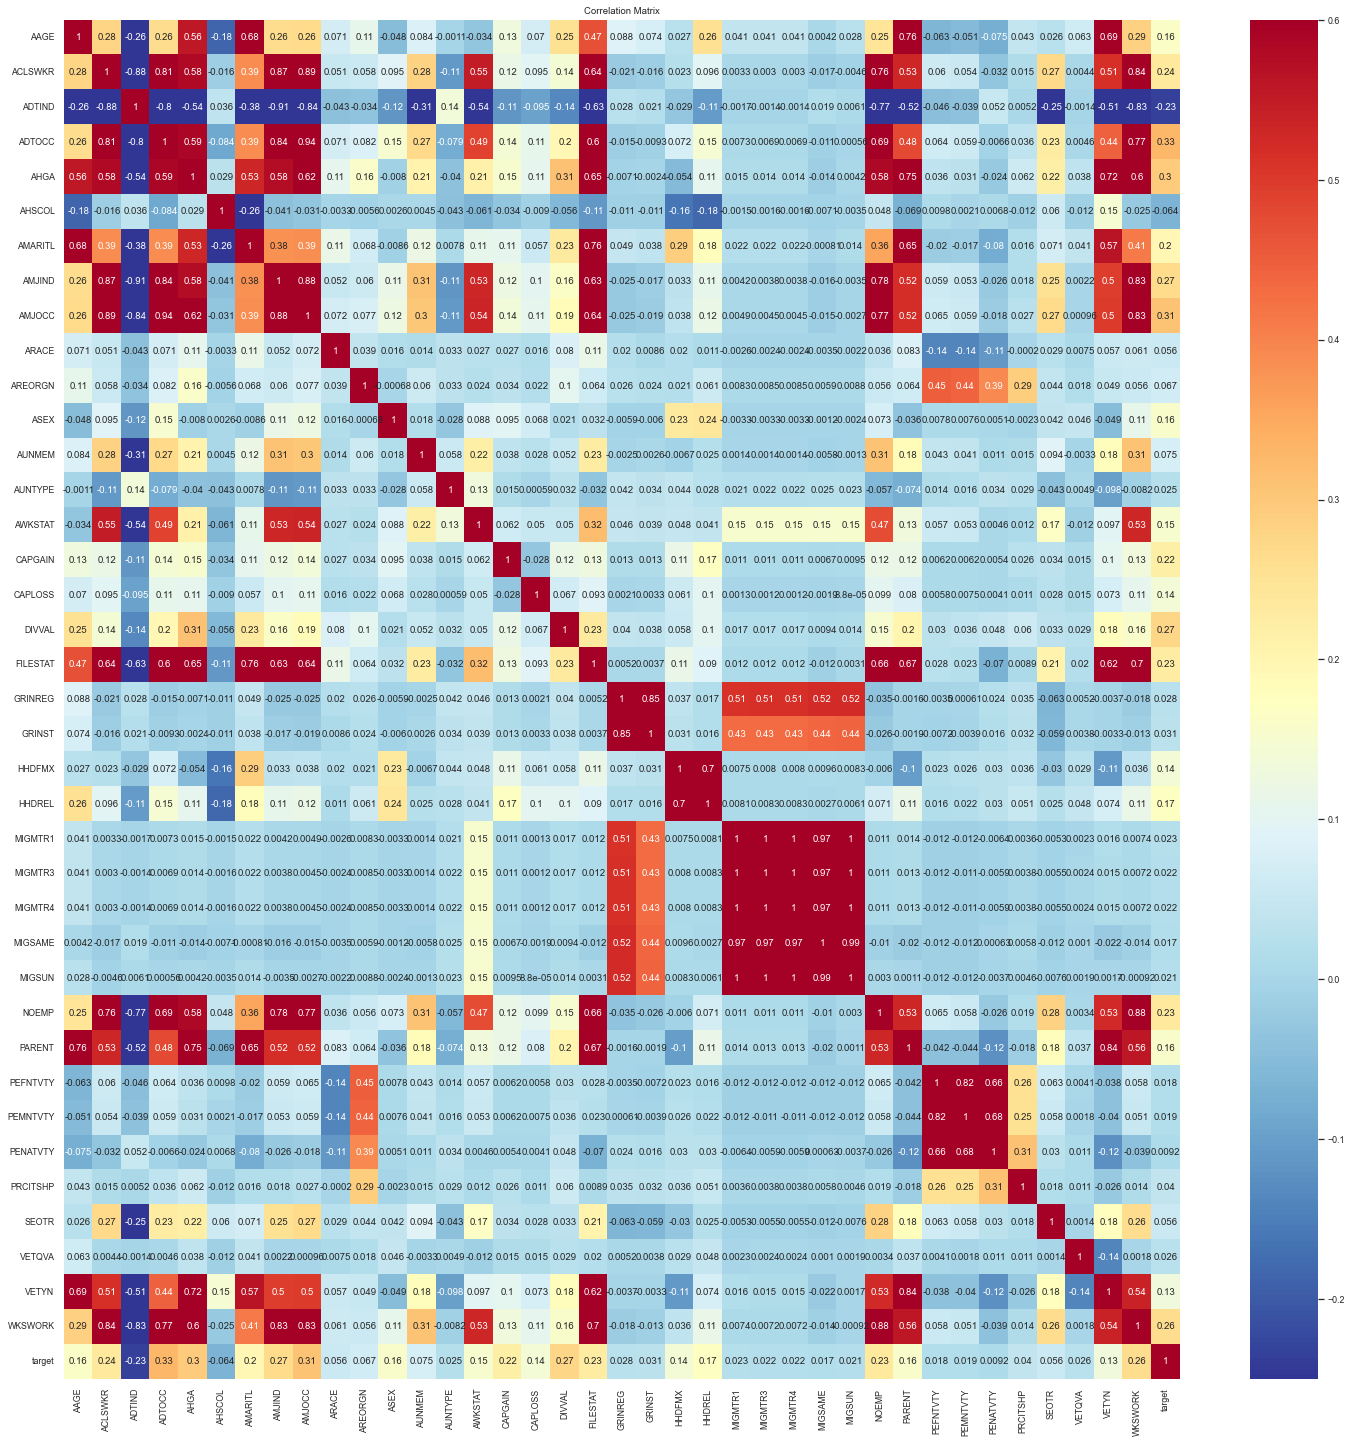

In [53]:
train_reatures = list(train.columns)
train_reatures.remove('AHRSPAY')

matrix = train[train_reatures].corr(method='spearman')

sns.set(rc={'figure.figsize': (25, 25)})
sns.set(font_scale=0.8)
sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Matrix');

In [91]:
del_features = list()
count_features = list(matrix.columns)
count_features.remove('target')

for i in range(len(count_features)):
    for j in range(i+1, len(count_features)):
        feature_1 = matrix.columns[i]
        feature_2 = matrix.columns[j]
        if abs(matrix[feature_1].at[feature_2]) > 0.8:
            if abs(matrix['target'].at[feature_2]) > abs(matrix['target'].at[feature_1]):
                del_features.append(feature_1)
            else:
                del_features.append(feature_2)
                
del_features = np.unique(del_features)
print("The number of features to remove:", len(del_features))
print("The number of features remaining:", len(matrix) - len(del_features) - 1)

The number of features to remove: 13
The number of features remaining: 25


## Task 2.4: Cluster analysis <a class="anchor" id="task24"></a>

**2.4.1.** To create a new feature, let's do a cluster analysis using **`K-means`** method, which can then be applied to the test sample.

Wi won't use DBSCAN algorithm, because when adding new observations from the test sample, the `DBSCAN` will have to recalculate the clusters.  
We won't use `t-SNE` either, since it is used for visualisation.


In [92]:
for del_feature in del_features:
    count_features.remove(del_feature)
print("The number of features remaining:", len(count_features))

The number of features remaining: 25


In [131]:
print(" Clusters |\tF1-score\t|\tAUC PR")
print("------------------------------------------------------")

for k in [5, 10, 20, 50, 100, 200, 300, 400, 500]:
    k_means = KMeans(n_clusters = k)
    clusters = k_means.fit_predict(train[count_features])
    
    prediction = pd.DataFrame(list(zip(clusters, y_train)), columns = ['cluster', 'target'])
    prediction['prediction'] = np.nan
    dict_clusters = dict()
    uniq_clusters = np.unique(clusters)
        
    for c in uniq_clusters:
        x = prediction[prediction.cluster == c]['target']
        pred = x.mean()
        dict_clusters[c] = pred
    
    prediction['prediction'] = [dict_clusters[i] for i in prediction.cluster]
    prediction['prediction_class'] = [round(dict_clusters[i]) for i in prediction.cluster]
    
    print(f"    {k}\t  |\t{round(metrics.f1_score(y_train, prediction.prediction_class), 4)}\t\t|\t{round(metrics.average_precision_score(y_train, prediction.prediction), 4)}")


 Clusters |	F1-score	|	AUC PR
------------------------------------------------------
    5	  |	0.0		|	0.1036
    10	  |	0.0		|	0.1262
    20	  |	0.0		|	0.1396
    50	  |	0.0444		|	0.1629
    100	  |	0.2414		|	0.2519
    200	  |	0.2298		|	0.3072
    300	  |	0.2398		|	0.3442
    400	  |	0.2285		|	0.3538
    500	  |	0.2284		|	0.3562


**2.4.2.** We see that the maximum jump in the metrics `F1-score` and `AUC PR` is achieved on **100 clusters** (Elbow Rule).
On the other hand, we don't want to take too many clusters, because when the clusters are encoded using the mean-target encoding method, we can get target leakage. We also want the number of observations in the clusters not to be very small.
Based on the obtained results and the arguments above, we take the number of clusters equal to 100.

In [133]:
k_means = KMeans(n_clusters = 100)
k_means.fit(train[count_features])
train['clusters'] = k_means.predict(train[count_features])

In [135]:
train['clusters']

0         44
1          4
2         23
3         15
4         15
          ..
199518    18
199519    45
199520     5
199521    52
199522    74
Name: clusters, Length: 199523, dtype: int32

**2.4.3.** Now let's encode the clusters using the `Mean-target encoding` method and add new feature to the train sample:

In [136]:
map_ = train.groupby('clusters').target.mean().to_dict()
train['clusters'] = train['clusters'].map(map_)
all_map_dict['clusters'] = map_

In [140]:
count_features.append('clusters')

---

# PART 3: Model training <a class="anchor" id="part3"></a>

## Task 3.1: Techniques for imbalanced data <a class="anchor" id="task31"></a>

**3.1.1.** We'll use **`SMOTE`** and **`Class_Weight`** (which converges asymptotically to random oversampling).  
We will configure `class_weight` as a hyperparameter of the model.

In [144]:
smote = SMOTE(random_state=0, sampling_strategy=0.8, k_neighbors=5)

## Task 3.2: Machine learning algorithms <a class="anchor" id="task32"></a>

**3.2.1.** Let's train the model on 3 different algorithms:
* **`Logistic regression`**
* **`Random Forest`**
* **`LightGBM`**

We will tune model hyperparameters for 5-fold cross-validation

We will also use 2 class balancing schemes:
* **`Сlass_weight`**
* **`SMOTE`**

In [145]:
X_train = train.drop(['target'], axis = 1)
y_train = train.target

In [153]:
cv = StratifiedKFold(n_splits=5)
scaler = StandardScaler()
scaler.fit(X_train[count_features])
X_train = pd.DataFrame(scaler.transform(X_train[count_features]), columns = count_features)

**3.2.2.** LogReg

In [234]:
# with Class_Weight

models = list()

print("c, cl_w \t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("------------------------------------------------------------------")

for c in [0.01, 0.05, 0.1, 0.5]:
    for w in [0.03, 0.06, 0.12, 0.24]:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]

            logreg = LogisticRegression(C = c, class_weight = {0 : w, 1:1}, max_iter = 500)
            logreg.fit(x_tr, y_tr)
            y_pred = logreg.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = logreg.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'logreg'
        model_param['model_param'] = {'C' : c, 'class_weight' : w}
        model_param['imbalance_type'] = 'class_weight'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f"{c}, {w}\t|  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")
        
        

c, cl_w 	|   AUC_PR  |  F1-score |  Precision |   Recall 
------------------------------------------------------------------
0.01, 0.03	|  0.561965 |  0.324406 |  0.195694  |  0.947827 
0.01, 0.06	|  0.563861 |  0.400337 |  0.258706  |  0.884671 
0.01, 0.12	|  0.565189 |  0.48586 |  0.355587  |  0.766839 
0.01, 0.24	|  0.565793 |  0.539024 |  0.466248  |  0.63875 
0.05, 0.03	|  0.564823 |  0.328031 |  0.198428  |  0.945808 
0.05, 0.06	|  0.565912 |  0.400742 |  0.259099  |  0.884026 
0.05, 0.12	|  0.566608 |  0.485105 |  0.354003  |  0.770473 
0.05, 0.24	|  0.566704 |  0.537631 |  0.462227  |  0.642465 
0.1, 0.03	|  0.565221 |  0.328698 |  0.19892  |  0.945727 
0.1, 0.06	|  0.566197 |  0.401213 |  0.259466  |  0.884349 
0.1, 0.12	|  0.566767 |  0.485079 |  0.353838  |  0.77112 
0.1, 0.24	|  0.56679 |  0.537913 |  0.462142  |  0.643434 
0.5, 0.03	|  0.565533 |  0.328984 |  0.199133  |  0.945647 
0.5, 0.06	|  0.566407 |  0.401331 |  0.259558  |  0.884429 
0.5, 0.12	|  0.566895 |  0.48481

In [235]:
# with SMOTE

print(" c \t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("----------------------------------------------------------")

for c in [0.01, 0.05, 0.1, 0.5]:
    for w in [1]:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]
            
            X_resampled, y_resampled = smote.fit_resample(x_tr, y_tr)

            logreg = LogisticRegression(C = c, class_weight = {0 : w, 1:1}, max_iter = 500)
            logreg.fit(X_resampled, y_resampled)
            y_pred = logreg.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = logreg.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'logreg'
        model_param['model_param'] = {'C' : c, 'class_weight' : w}
        model_param['imbalance_type'] = 'SMOTE'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f"{c} \t|  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")
        


 c 	|   AUC_PR  |  F1-score |  Precision |   Recall 
----------------------------------------------------------
0.01 	|  0.565489 |  0.441097 |  0.299553  |  0.836295 
0.05 	|  0.565599 |  0.440952 |  0.299408  |  0.836376 
0.1 	|  0.565612 |  0.440866 |  0.299349  |  0.836214 
0.5 	|  0.565618 |  0.440956 |  0.299402  |  0.836456 


**3.2.3.** Random Forest

In [236]:
# with Class_Weight

max_depth = [3, 5, 7]
n_estimators = [50, 100]
min_samples_leaf = [10, 25, 50]
class_weight = [0.06, 0.12]

grid_search = [(d, e, l, w) for d in max_depth for e in n_estimators for l in min_samples_leaf  for w in class_weight]

print("d, e, l, w \t\t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("--------------------------------------------------------------------------")

for p in grid_search:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]
            
            rf = RandomForestClassifier(max_depth= p[0], 
                                        n_estimators = p[1],
                                        min_samples_leaf = p[2], 
                                        class_weight = {0 : p[3], 1:1}, 
                                        random_state = 0, 
                                        n_jobs = -1)
            
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = rf.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'rf'
        model_param['model_param'] = {'max_depth' : p[0], 'n_estimators' : p[1] , 'min_samples_leaf' : p[2], 'class_weight' : p[3]}
        model_param['imbalance_type'] = 'class_weight'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f" {p[0]}, {p[1]}, {p[2]}, {p[3]}\t  |  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")


d, e, l, w 		|   AUC_PR  |  F1-score |  Precision |   Recall 
--------------------------------------------------------------------------
 3, 50, 10, 0.06	  |  0.504464 |  0.342221 |  0.209877  |  0.926507 
 3, 50, 10, 0.12	  |  0.521898 |  0.454257 |  0.323963  |  0.759973 
 3, 50, 25, 0.06	  |  0.504179 |  0.342548 |  0.210128  |  0.926426 
 3, 50, 25, 0.12	  |  0.522217 |  0.455556 |  0.325195  |  0.760458 
 3, 50, 50, 0.06	  |  0.504469 |  0.340848 |  0.208836  |  0.926749 
 3, 50, 50, 0.12	  |  0.521428 |  0.458289 |  0.327916  |  0.760862 
 3, 100, 10, 0.06	  |  0.508017 |  0.338974 |  0.207491  |  0.925456 
 3, 100, 10, 0.12	  |  0.524751 |  0.457091 |  0.325803  |  0.765707 
 3, 100, 25, 0.06	  |  0.508299 |  0.338962 |  0.207482  |  0.925457 
 3, 100, 25, 0.12	  |  0.525315 |  0.457189 |  0.325805  |  0.766192 
 3, 100, 50, 0.06	  |  0.507795 |  0.338197 |  0.206884  |  0.925941 
 3, 100, 50, 0.12	  |  0.524257 |  0.457741 |  0.326347  |  0.766353 
 5, 50, 10, 0.06	  |  0.53981

In [237]:
# with SMOTE

max_depth = [3, 5, 7]
n_estimators = [50, 100]
min_samples_leaf = [10, 25, 50]
class_weight = [1]

grid_search = [(d, e, l, w) for d in max_depth for e in n_estimators for l in min_samples_leaf  for w in class_weight]

print("d, e, l, w \t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("--------------------------------------------------------------------------")

for p in grid_search:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]
            
            X_resampled, y_resampled = smote.fit_resample(x_tr, y_tr)
            
            rf = RandomForestClassifier(max_depth= p[0], 
                                        n_estimators = p[1],
                                        min_samples_leaf = p[2], 
                                        class_weight = {0 : p[3], 1:1}, 
                                        random_state = 0, 
                                        n_jobs = -1)
            
            rf.fit(X_resampled, y_resampled)
            y_pred = rf.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = rf.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'rf'
        model_param['model_param'] = {'max_depth' : p[0], 'n_estimators' : p[1] , 'min_samples_leaf' : p[2], 'class_weight' : p[3]}
        model_param['imbalance_type'] = 'class_weight'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f" {p[0]}, {p[1]}, {p[2]}, {p[3]}\t  |  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")


d, e, l, w 	|   AUC_PR  |  F1-score |  Precision |   Recall 
--------------------------------------------------------------------------
 3, 50, 10, 1	  |  0.49439 |  0.416355 |  0.278243  |  0.827088 
 3, 50, 25, 1	  |  0.494409 |  0.416355 |  0.278243  |  0.827088 
 3, 50, 50, 1	  |  0.494406 |  0.416355 |  0.278243  |  0.827088 
 3, 100, 10, 1	  |  0.485823 |  0.410598 |  0.273237  |  0.825957 
 3, 100, 25, 1	  |  0.485827 |  0.410567 |  0.273217  |  0.825877 
 3, 100, 50, 1	  |  0.485818 |  0.410567 |  0.273218  |  0.825877 
 5, 50, 10, 1	  |  0.518303 |  0.437807 |  0.29835  |  0.822484 
 5, 50, 25, 1	  |  0.518471 |  0.441077 |  0.301765  |  0.819415 
 5, 50, 50, 1	  |  0.517477 |  0.440292 |  0.301276  |  0.817639 
 5, 100, 10, 1	  |  0.520882 |  0.438473 |  0.298723  |  0.824342 
 5, 100, 25, 1	  |  0.519539 |  0.439525 |  0.29966  |  0.824261 
 5, 100, 50, 1	  |  0.518768 |  0.437922 |  0.298856  |  0.819093 
 7, 50, 10, 1	  |  0.541726 |  0.458239 |  0.318927  |  0.813762 
 7,

**3.2.4.** LightGBM

In [238]:
# with Class_Weight

max_depth = [5, 7, 9]
learning_rate = [0.001, 0.01]
n_estimators = [50, 100, 150]
class_weight = [0.06, 0.12]
grid_search = [(d, l, e, w) for d in max_depth for l in learning_rate for e in n_estimators for w in class_weight]


print("d, l, e, w \t\t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("--------------------------------------------------------------------------")

for p in grid_search:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]
            
            
            lgbm = LGBMClassifier(max_depth= p[0], 
                                 learning_rate = p[1] , 
                                 n_estimators = p[2], 
                                 class_weight = {0 : p[3], 1:1},  
                                 random_state = 0)
            
            lgbm.fit(x_tr, y_tr)
            y_pred = lgbm.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = lgbm.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'lgbm'
        model_param['model_param'] = {'max_depth' : p[0], 'learning_rate' : p[1] , 'n_estimators' : p[2], 'class_weight' : p[3]}
        model_param['imbalance_type'] = 'class_weight'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f"{p[0]}, {p[1]}, {p[2]}, {p[3]}\t|  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")



d, l, e, w 		|   AUC_PR  |  F1-score |  Precision |   Recall 
--------------------------------------------------------------------------
5, 0.001, 50, 0.06	|  0.434505 |  0.165615 |  0.090289  |  0.999515 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

5, 0.001, 50, 0.12	|  0.452008 |  0.0 |  0.0  |  0.0 
5, 0.001, 100, 0.06	|  0.443938 |  0.308802 |  0.184739  |  0.94169 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

5, 0.001, 100, 0.12	|  0.459745 |  0.0 |  0.0  |  0.0 
5, 0.001, 150, 0.06	|  0.446958 |  0.333049 |  0.202885  |  0.929575 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

5, 0.001, 150, 0.12	|  0.476497 |  0.0 |  0.0  |  0.0 
5, 0.01, 50, 0.06	|  0.500521 |  0.364366 |  0.227594  |  0.913342 
5, 0.01, 50, 0.12	|  0.531477 |  0.542826 |  0.517739  |  0.57075 
5, 0.01, 100, 0.06	|  0.54099 |  0.376201 |  0.237236  |  0.908415 
5, 0.01, 100, 0.12	|  0.561061 |  0.519715 |  0.400904  |  0.738653 
5, 0.01, 150, 0.06	|  0.565754 |  0.385244 |  0.244657  |  0.905911 
5, 0.01, 150, 0.12	|  0.582194 |  0.50238 |  0.371628  |  0.775238 
7, 0.001, 50, 0.06	|  0.436703 |  0.173192 |  0.094834  |  0.998465 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

7, 0.001, 50, 0.12	|  0.45468 |  0.0 |  0.0  |  0.0 
7, 0.001, 100, 0.06	|  0.44836 |  0.294531 |  0.174065  |  0.957843 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

7, 0.001, 100, 0.12	|  0.459513 |  0.0 |  0.0  |  0.0 
7, 0.001, 150, 0.06	|  0.451002 |  0.327258 |  0.198205  |  0.938944 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

7, 0.001, 150, 0.12	|  0.470792 |  0.0 |  0.0  |  0.0 
7, 0.01, 50, 0.06	|  0.50062 |  0.372117 |  0.233667  |  0.913342 
7, 0.01, 50, 0.12	|  0.536213 |  0.539631 |  0.468722  |  0.636005 
7, 0.01, 100, 0.06	|  0.535833 |  0.387577 |  0.246581  |  0.905346 
7, 0.01, 100, 0.12	|  0.570873 |  0.516806 |  0.395679  |  0.744871 
7, 0.01, 150, 0.06	|  0.567888 |  0.394948 |  0.252554  |  0.905588 
7, 0.01, 150, 0.12	|  0.587294 |  0.502233 |  0.369322  |  0.784606 
9, 0.001, 50, 0.06	|  0.43361 |  0.173225 |  0.094853  |  0.998465 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

9, 0.001, 50, 0.12	|  0.45361 |  0.0 |  0.0  |  0.0 
9, 0.001, 100, 0.06	|  0.444477 |  0.301293 |  0.178854  |  0.95542 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

9, 0.001, 100, 0.12	|  0.458696 |  0.0 |  0.0  |  0.0 
9, 0.001, 150, 0.06	|  0.447563 |  0.32685 |  0.197846  |  0.939509 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

9, 0.001, 150, 0.12	|  0.469145 |  0.0 |  0.0  |  0.0 
9, 0.01, 50, 0.06	|  0.499823 |  0.371387 |  0.232915  |  0.916249 
9, 0.01, 50, 0.12	|  0.530675 |  0.537521 |  0.464751  |  0.637377 
9, 0.01, 100, 0.06	|  0.52957 |  0.385785 |  0.244897  |  0.908496 
9, 0.01, 100, 0.12	|  0.565715 |  0.51546 |  0.394274  |  0.744387 
9, 0.01, 150, 0.06	|  0.567407 |  0.394456 |  0.251956  |  0.908092 
9, 0.01, 150, 0.12	|  0.586509 |  0.49942 |  0.365604  |  0.787756 


In [239]:
# with SMOTE

max_depth = [5, 7, 9]
learning_rate = [0.001, 0.01]
n_estimators = [50, 100, 150]
class_weight = [1]
grid_search = [(d, l, e, w) for d in max_depth for l in learning_rate for e in n_estimators for w in class_weight]


print("d, l, e, w \t\t|   AUC_PR  |  F1-score |  Precision |   Recall ")
print("--------------------------------------------------------------------------")

for p in grid_search:
        aps_kfold = []
        f1_kfold = []
        precision_kfold = []
        recall_kfold = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_train, y_train):
            x_tr, x_test = X_train.loc[train_idx], X_train.loc[test_idx]
            y_tr, y_test = y_train[train_idx], y_train[test_idx]
            
            X_resampled, y_resampled = smote.fit_resample(x_tr, y_tr)
            
            lgbm = LGBMClassifier(max_depth= p[0], 
                                 learning_rate = p[1] , 
                                 n_estimators = p[2], 
                                 class_weight = {0 : p[3], 1:1},  
                                 random_state = 0)
            
            lgbm.fit(X_resampled, y_resampled)
            y_pred = lgbm.predict_proba(x_test)[:, 1]
            aps_kfold.append(metrics.average_precision_score(y_test, y_pred))
            
            y_pred_class = lgbm.predict(x_test)
            f1_kfold.append(metrics.f1_score(y_test, y_pred_class))
            precision_kfold.append(metrics.precision_score(y_test, y_pred_class))
            recall_kfold.append(metrics.recall_score(y_test, y_pred_class))

        model_param['model_type'] = 'lgbm'
        model_param['model_param'] = {'max_depth' : p[0], 'learning_rate' : p[1] , 'n_estimators' : p[2], 'class_weight' : p[3]}
        model_param['imbalance_type'] = 'class_weight'
        model_param['aps_val'] = np.mean(aps_kfold)
        model_param['f1_val'] = np.mean(f1_kfold)
        model_param['precision_val'] = np.mean(precision_kfold)
        model_param['recall_val'] = np.mean(recall_kfold)
        
        models.append(model_param)
        
        print(f"{p[0]}, {p[1]}, {p[2]}, {p[3]}\t|  {round(np.mean(aps_kfold),6)} |  {round(np.mean(f1_kfold),6)} |  {round(np.mean(precision_kfold),6)}  |  {round(np.mean(recall_kfold),6)} ")



d, l, e, w 		|   AUC_PR  |  F1-score |  Precision |   Recall 
--------------------------------------------------------------------------


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

5, 0.001, 50, 1	|  0.398517 |  0.0 |  0.0  |  0.0 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

5, 0.001, 100, 1	|  0.401895 |  0.0 |  0.0  |  0.0 
5, 0.001, 150, 1	|  0.407697 |  0.393429 |  0.540748  |  0.311017 
5, 0.01, 50, 1	|  0.458725 |  0.464795 |  0.337733  |  0.745516 
5, 0.01, 100, 1	|  0.487938 |  0.453097 |  0.319167  |  0.780731 
5, 0.01, 150, 1	|  0.519741 |  0.461268 |  0.325923  |  0.789049 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

7, 0.001, 50, 1	|  0.410957 |  0.0 |  0.0  |  0.0 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

7, 0.001, 100, 1	|  0.414875 |  0.0 |  0.0  |  0.0 
7, 0.001, 150, 1	|  0.421577 |  0.492307 |  0.46095  |  0.528913 
7, 0.01, 50, 1	|  0.452352 |  0.476425 |  0.355743  |  0.721288 
7, 0.01, 100, 1	|  0.492813 |  0.466439 |  0.333424  |  0.776126 
7, 0.01, 150, 1	|  0.517559 |  0.474672 |  0.341728  |  0.777015 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

9, 0.001, 50, 1	|  0.400005 |  0.0 |  0.0  |  0.0 


C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svafa\AppData\Roaming\Python\Python38\site-packages\skl

9, 0.001, 100, 1	|  0.401831 |  0.0 |  0.0  |  0.0 
9, 0.001, 150, 1	|  0.407605 |  0.493362 |  0.453254  |  0.542483 
9, 0.01, 50, 1	|  0.450113 |  0.485015 |  0.372414  |  0.695524 
9, 0.01, 100, 1	|  0.49151 |  0.4765 |  0.348934  |  0.751414 
9, 0.01, 150, 1	|  0.517818 |  0.482937 |  0.354084  |  0.759328 


**3.2.5.** Results

In [241]:
models_results = pd.DataFrame(models)
models_results.head()

,model_type,model_param,imbalance_type,aps_val,f1_val,precision_val,recall_val
0,logreg,"{'C': 0.01, 'class_weight': 0.03}",class_weight,0.561965,0.324406,0.195694,0.947827
1,logreg,"{'C': 0.01, 'class_weight': 0.06}",class_weight,0.563861,0.400337,0.258706,0.884671
2,logreg,"{'C': 0.01, 'class_weight': 0.12}",class_weight,0.565189,0.485860,0.355587,0.766839
3,logreg,"{'C': 0.01, 'class_weight': 0.24}",class_weight,0.565793,0.539024,0.466248,0.638750
4,logreg,"{'C': 0.05, 'class_weight': 0.03}",class_weight,0.564823,0.328031,0.198428,0.945808


**3.2.6.** Best models for 3 algorithms

In [253]:
models_results = pd.DataFrame(models)

best_logreg = models_results[models_results['model_type'] == 'logreg'].sort_values('aps_val', ascending = False)[:1]
best_rf = models_results[models_results['model_type'] == 'rf'].sort_values('aps_val', ascending = False)[:1]
best_lgbm = models_results[models_results['model_type'] == 'lgbm'].sort_values('aps_val', ascending = False)[:1]

print(" Model                |  Imbalanced method  |  AUC PR")
print("--------------------------------------------------------")
print(f" Logistic Regression: |    {best_logreg['imbalance_type'].values[0]}     | {round(best_logreg['aps_val'].values[0],6)}")
print(f" Random Forest:       |    {best_rf['imbalance_type'].values[0]}     | {round(best_rf['aps_val'].values[0],6)}")
print(f" LightGBM:            |    {best_lgbm['imbalance_type'].values[0]}     | {round(best_lgbm['aps_val'].values[0],6)}")

print("\n")

print(" Model                |  Hyperparameters")
print("-------------------------------------------------------------------------------------------------------------")
print(f" Logistic Regression: | {best_logreg['model_param'].values[0]}")
print(f" Random Forest:       | {best_rf['model_param'].values[0]}")
print(f" LightGBM:            | {best_lgbm['model_param'].values[0]}")

 Model                |  Imbalanced method  |  AUC PR
--------------------------------------------------------
 Logistic Regression: |    class_weight     | 0.566895
 Random Forest:       |    class_weight     | 0.583727
 LightGBM:            |    class_weight     | 0.587294


 Model                |  Hyperparameters
-------------------------------------------------------------------------------------------------------------
 Logistic Regression: | {'C': 0.5, 'class_weight': 0.12}
 Random Forest:       | {'max_depth': 7, 'n_estimators': 100, 'min_samples_leaf': 10, 'class_weight': 0.12}
 LightGBM:            | {'max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 150, 'class_weight': 0.12}


**3.2.7.** Let's train 3 models with the best hyperparameters

In [254]:
# Logistic Regression
logreg_best = LogisticRegression(C = 0.5, 
                                 class_weight = {0 : 0.12, 1:1})
logreg_best.fit(x_tr, y_tr)

LogisticRegression(C=0.5, class_weight={0: 0.12, 1: 1})

In [255]:
# Random Forest
rf_best = RandomForestClassifier(max_depth= 7, 
                                 n_estimators =  100,
                                 min_samples_leaf = 10 , 
                                 class_weight = {0 : 0.12, 1:1},
                                 random_state = 0,
                                 n_jobs = -1)
rf_best.fit(x_tr, y_tr)

RandomForestClassifier(class_weight={0: 0.12, 1: 1}, max_depth=7,
                       min_samples_leaf=10, n_jobs=-1, random_state=0)

In [256]:
# LightGBM
lgbm_best = LGBMClassifier(max_depth= 7,
                           learning_rate = 0.01 , 
                           n_estimators = 150,
                           class_weight = {0 : 0.12, 1:1},  
                           random_state = 0)
lgbm_best.fit(x_tr, y_tr)

LGBMClassifier(class_weight={0: 0.12, 1: 1}, learning_rate=0.01, max_depth=7,
               n_estimators=150, random_state=0)

## Task 3.3: Blending/stacking <a class="anchor" id="task33"></a>

**3.3.1.** Let's train the metamodel on 3 basic basic models using the **`Blending`** technique:
* **`Logistic regression`**
* **`Random Forest`**
* **`LightGBM`**


In [343]:
y_val_test = test.target
X_val_test = test.drop(['target'], axis = 1)

In [344]:
# Encoding
for key in all_map_dict.keys():
    if key in X_val_test.columns:
        X_val_test[key] = X_val_test[key].map(all_map_dict[key])

In [341]:
# control
for c in x_tr.columns:
    if c not in X_val_test.columns:
        print(c)

logreg_best
rf_best
lgbm_best


In [345]:
cluster_test = count_features.copy()
cluster_test.remove('clusters')

In [346]:
# create Clusters
X_val_test['clusters'] = k_means.predict(X_val_test[cluster_test])
X_val_test['clusters'] = X_val_test['clusters'].map(all_map_dict['clusters'])

In [347]:
X_val_test.shape, X_train.shape

((99762, 40), (199523, 26))

In [350]:
X_val_test = pd.DataFrame(scaler.transform(X_val_test[count_features]), columns = count_features)

In [351]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=0, test_size=0.5, stratify=y_val_test)

In [352]:
print(y_val.mean(), y_test.mean())

0.06200757803572503 0.06200757803572503


**3.3.2.** Let's take a look at the quality of our best models on a validation sample:

In [279]:
y_predict_logreg = logreg_best.predict_proba(X_val)[:, 1]
y_predict_rf = rf_best.predict_proba(X_val)[:, 1]
y_predict_lgbm = lgbm_best.predict_proba(X_val)[:, 1]

print('Model \t|  AUC PR (val)')
print('------------------------')
print(f"LogReg \t|    {round(metrics.average_precision_score(y_val, y_predict_logreg), 5)}")
print(f"RF \t|    {round(metrics.average_precision_score(y_val, y_predict_rf), 5)}")
print(f"LGBM \t|    {round(metrics.average_precision_score(y_val, y_predict_lgbm), 5)}")

Model 	|  AUC PR (val)
------------------------
LogReg 	|    0.57185
RF 	|    0.58171
LGBM 	|    0.59306


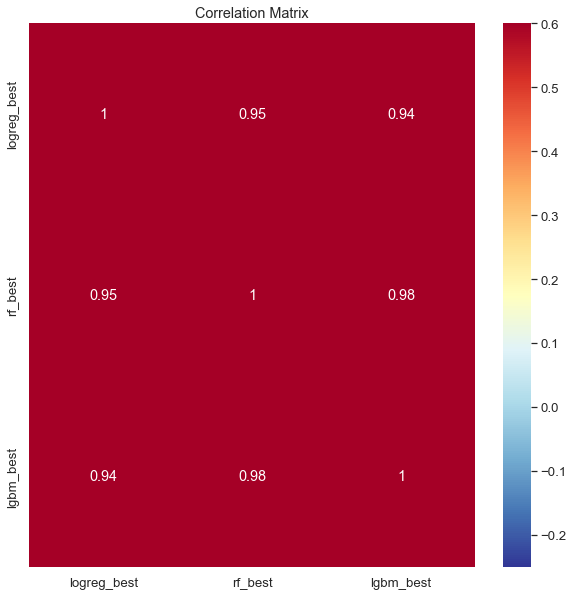

In [302]:
X_val_blend = pd.concat([pd.Series(logreg_best.predict_proba(X_val)[:, 1], name="logreg_best"),
                         pd.Series(rf_best.predict_proba(X_val)[:, 1], name="rf_best"),
                         pd.Series(lgbm_best.predict_proba(X_val)[:, 1], name="lgbm_best")], axis=1)
X_val_blend.set_index(y_val.index, inplace=True)

sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.2)
blend_correlation = X_val_blend.corr()
sns.heatmap(blend_correlation, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Matrix');

**3.3.3.** Now let's train the meta model on the basic models using the **`Blending`** technique and logistic regression:

In [354]:
y_val.reset_index(drop = True, inplace = True)
X_val_blend.reset_index(drop = True, inplace = True)

In [355]:
meta_models = []

print("c, w \t\t|   AUC_PR  ")
print("----------------------------------")

for c in [0.01, 0.05, 0.1, 0.5]:
    for w in [0.03, 0.06, 0.12, 0.24]:
        aps_val = []
        f1_val = []
        precision_val = []
        recall_val = []
        model_param = dict()

        for train_idx, test_idx in cv.split(X_val_blend, y_val):
            x_tr_, x_test_ = X_val_blend.loc[train_idx], X_val_blend.loc[test_idx]
            y_tr_, y_test_ = y_val[train_idx], y_val[test_idx]

            logreg = LogisticRegression(C = c, class_weight = {0 : w, 1:1})
            logreg.fit(x_tr_, y_tr_)
            y_pred = logreg.predict_proba(x_test_)[:, 1]
            aps_val.append(metrics.average_precision_score(y_test_, y_pred))

        
        model_param['model_type'] = 'logreg'
        model_param['model_param'] = {'C' : c, 'class_weight' : w}
        model_param['aps_val'] = np.mean(aps_val)
        
        meta_models.append(model_param)

        print(f"{c}, {w}\t|  {round(np.mean(aps_val),6)} ")
  

c, w 		|   AUC_PR  
----------------------------------
0.01, 0.03	|  0.600577 
0.01, 0.06	|  0.60056 
0.01, 0.12	|  0.600585 
0.01, 0.24	|  0.600618 
0.05, 0.03	|  0.600498 
0.05, 0.06	|  0.600566 
0.05, 0.12	|  0.600625 
0.05, 0.24	|  0.600733 
0.1, 0.03	|  0.600377 
0.1, 0.06	|  0.600451 
0.1, 0.12	|  0.600511 
0.1, 0.24	|  0.600561 
0.5, 0.03	|  0.599323 
0.5, 0.06	|  0.599402 
0.5, 0.12	|  0.599629 
0.5, 0.24	|  0.600023 


**3.3.4.** Let's select the best hyperparameters and train the final metamodel:

In [356]:
meta_result = pd.DataFrame(meta_models)
meta_result.sort_values('aps_val', ascending = False)[:1]

,model_type,model_param,aps_val
7,logreg,"{'C': 0.05, 'class_weight': 0.24}",0.600733


In [357]:
best_blend_model = LogisticRegression(C = 0.05, class_weight = {0 : 0.24, 1:1})
best_blend_model.fit(X_val_blend, y_val)

LogisticRegression(C=0.05, class_weight={0: 0.24, 1: 1})

---

# PART 4: Summary <a class="anchor" id="part4"></a>

## Task 4.1: Quality of the models <a class="anchor" id="task41"></a>

**4.1.1** Let's evaluate the quality of the best base models and the best metamodel on a test sample

In [358]:
X_test_blend = pd.concat([pd.Series(logreg_best.predict_proba(X_test)[:, 1], name="logreg_best"),
                          pd.Series(rf_best.predict_proba(X_test)[:, 1], name="rf_best"),
                          pd.Series(lgbm_best.predict_proba(X_test)[:, 1], name="lgbm_best")], axis=1)

X_test_blend['blend_model'] = best_blend_model.predict_proba(X_test_blend)[:, 1]

In [360]:
print("Model    \t|   AUC_PR  ")
print("-------------------------------")

for m in X_test_blend.columns:
    print(f"{m} \t|    {round(metrics.average_precision_score(y_test, X_test_blend[m]), 5)}")

Model    	|   AUC_PR  
-------------------------------
logreg_best 	|    0.56982
rf_best 	|    0.58901
lgbm_best 	|    0.5914
blend_model 	|    0.60322


**4.1.2** We got the expected results:
1. `Random Forest` model is better than `Logistic Regression`
2. The `LightGBM` model is better than the `Random Forest`
3. `Metamodel` is better than every basic model

## Task 4.2: Models interpretation <a class="anchor" id="task42"></a>

**4.2.1.** For the best basic model, we will use the **`SHAP`** and **`Permutation_importance`** interpreters

In [361]:
# SHAP
explain_m = shap.TreeExplainer(lgbm_best)
shap_values = explain_m.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


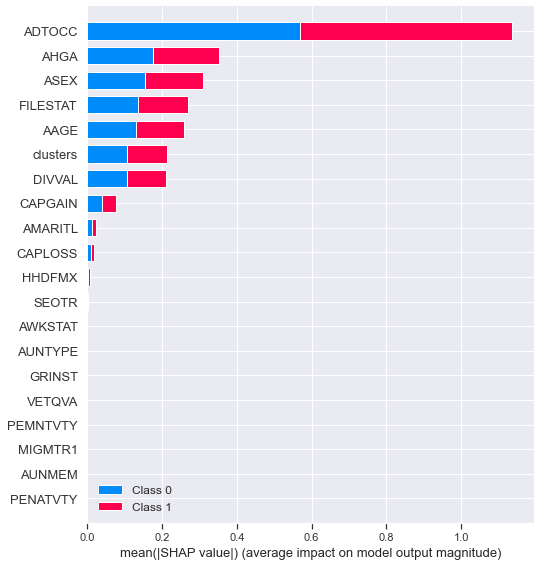

In [362]:
# SHAP
shap.summary_plot(shap_values=shap_values, features=X_test, plot_type='bar')

**4.2.2.** We see that the strongest features by **`SHAP`** in the `LGBM model` are:
1. **`ADTOCC`** - occupation code  
2. **`AHGA`** - education
3. **`ASEX`** - sex
4. **`FILESTAT`** - tax filer status
5. **`AAGE`** - age
6. **`clusters`** - cluster feature
7. **`DIVVAL`** - divdends from stocks

In [375]:
# Permutation_importance
importances = permutation_importance(lgbm_best, X_test, y_test, scoring='f1', 
                                     n_repeats=7, random_state=13)['importances_mean']
features = pd.DataFrame(importances, X_test.columns, columns=["importance"])
max_perm_imp = features.importance.nlargest(1).index[0]


In [376]:
# Permutation_importance

features.sort_values('importance', ascending=False)

,importance
ADTOCC,0.101084
AAGE,0.031681
ASEX,0.024601
CAPGAIN,0.021606
DIVVAL,0.018878
AHGA,0.005510
CAPLOSS,0.002855
HHDFMX,0.000284
ARACE,0.000000
VETQVA,0.000000


**4.2.3.** We see that the strongest features by **`Permutation_importance`** in the `LGBM model` are:
1. **`ADTOCC`** - occupation code (1)
2. **`AAGE`** - age (5)
3. **`ASEX`** - sex (3)
4. **`CAPGAIN`** - capital gains (8)
5. **`DIVVAL`** - divdends from stocks (7)
6. **`clusters`** (negative coefficient) - cluster feature (6)
7. **`AHGA`** - education (2)

We can see that many of these features hit the top-best by SHAP (the SHAP-rating is indicated in brackets)

**4.2.4.** Since we trained the metamodel using logistic regression, it is best to interpret such a model using **`the regression coefficients`** of the independent variables (basic models)

In [371]:
X_test_blend.columns

Index(['logreg_best', 'rf_best', 'lgbm_best', 'blend_model'], dtype='object')

In [373]:
# meta_model

importance_blend = pd.DataFrame()
importance_blend['feature'] = ['logreg_best', 'rf_best', 'lgbm_best']
importance_blend['coef'] = best_blend_model.coef_[0]
importance_blend['coef_abs'] = abs(best_blend_model.coef_)[0]

In [374]:
importance_blend

,feature,coef,coef_abs
0,logreg_best,2.167928,2.167928
1,rf_best,2.508814,2.508814
2,lgbm_best,2.398856,2.398856


**4.2.5.** We see that the greatest contribution to the metamodel was made by **`Random Forest`**.

## Task 4.3: Conclusions <a class="anchor" id="task43"></a>

1. We explored data about the income of USA citizens and trained models to predict binary income (rich or poor) based on the US Census.
2. When developing the model, we did data exploration, cleaning, transformation and feature selection.
3. For data exploration and development of a special feature, we used **`K-means`** clustering.
4. To train the models, we used 3 ML-algorithms with different statistical properties: `Logistic Regression` (describes linear dependencies), **`Random Forest`** (low bias model), **`Gradient Boosting - LGBM`** (low variance model).
5. We tuned each model according to the hyperparameter grid using the **`5-fold cross-validation`** scheme.
6. We also used 2 methods of dealing with imbalanced data - **`SMOTE`** and **`Class_weight`**.
7. Based on the best basic models, we built a **`Metamodel`** using the **`Blending procedure`**. The **`Metamodel`** showed the best quality due to the fact that the basic models had different statistical properties, which made it possible to predict income even more accurately.
8. The results showed a satisfactory quality of forecasting according to the **`AUC PR`** metric on all the best models.
9. Interpretation of the models made it possible to see that characteristics such as **`Profession`**, **`Sex`**, **`Age`** and **`Education`** have the strongest influence on a person's income.
10. In the future, we can improve the quality of models by additional feature engineering and better tuning model hyperparameters (such as **`Class_weight`**).

---

*Prepared by Sergey Afanasiev*